In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline
from matplotlib.pyplot import cm

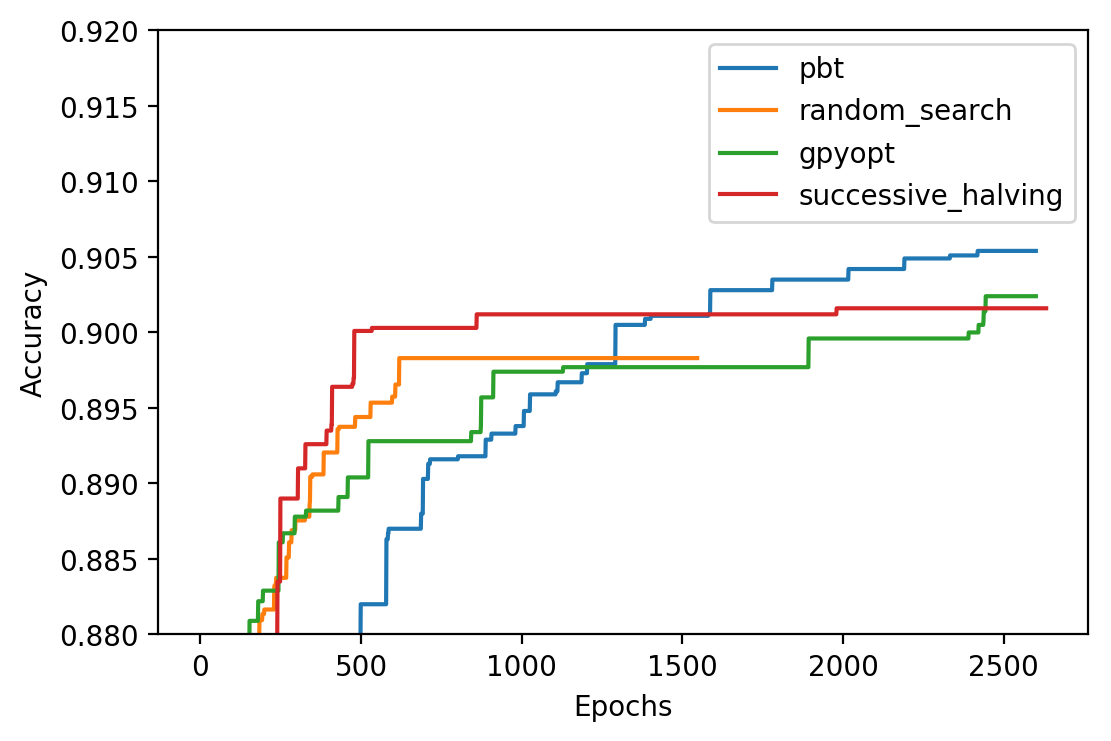

In [61]:
fig, ax = plt.subplots(dpi=200)

for alg_name in ['pbt', 'random_search', 'gpyopt', 'successive_halving']:
    best_accuracy = []
    for d in os.listdir('.'):
        if d.startswith("output") and alg_name in d:
            df = pd.read_csv(os.path.join(d, "results.csv")).query("Status == 'INTERMEDIATE'")
            best_accuracy.append(np.maximum.accumulate(df.Objective))
    if len(best_accuracy) > 0:
        minlen = min(len(acc) for acc in best_accuracy)
        best_accuracy_mean = np.vstack([acc[:minlen] for acc in best_accuracy]).mean(axis=0)
        epoch = np.arange(1, len(best_accuracy_mean)+1)
        ax.plot(epoch, best_accuracy_mean, label=alg_name)
ax.set_ylim([0.88, 0.92])
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")
ax.legend()

In [63]:
fig.savefig("../../../docs/algorithms/fashion-mlp-benchmark.png")

# PBT Analysis (one run)

Text(0,0.5,'Batch Size')

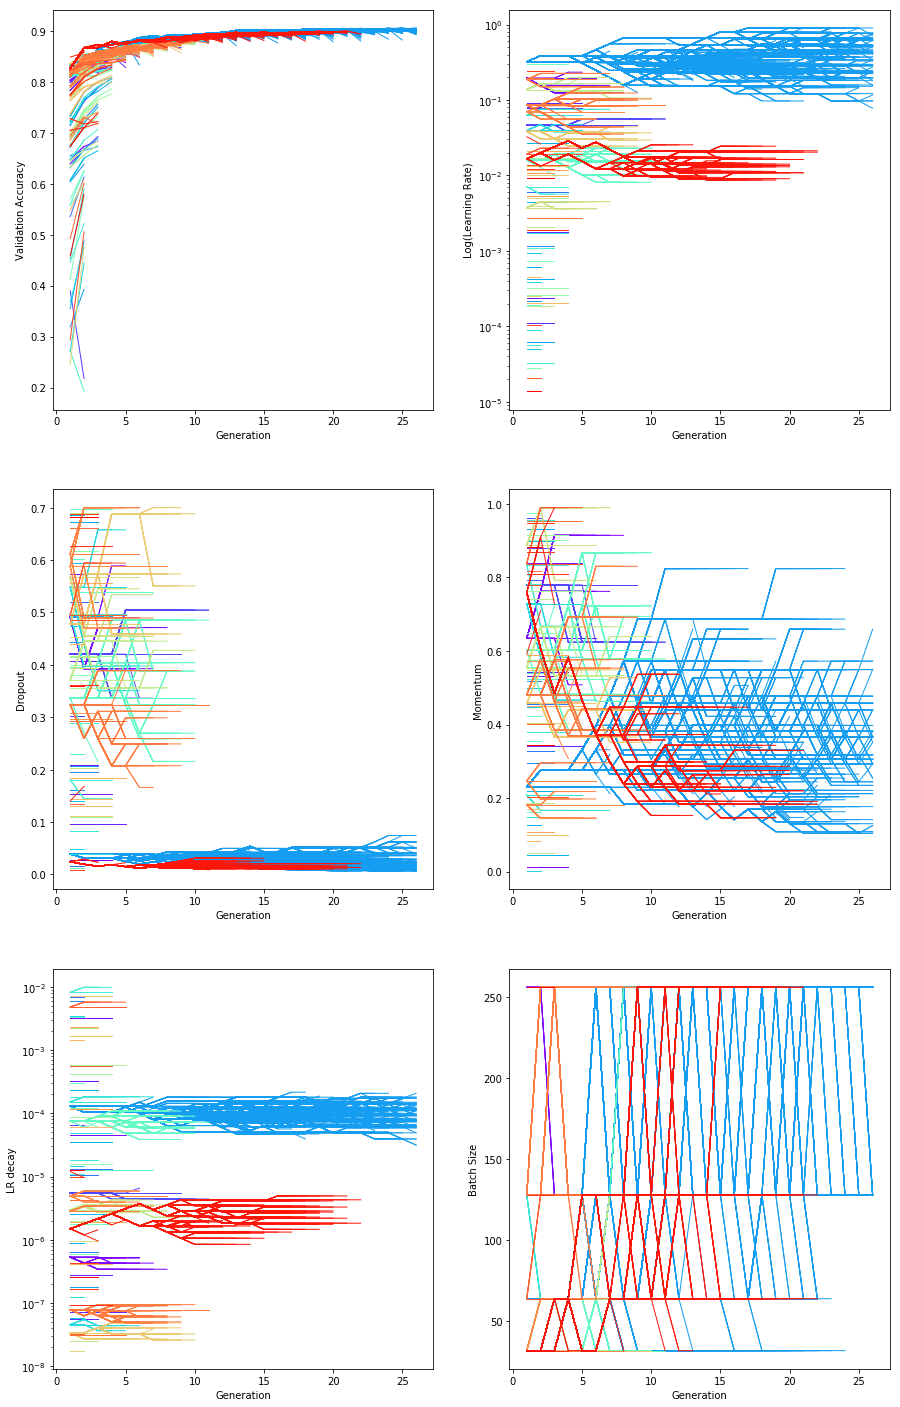

In [54]:
pbt_path = [d for d in os.listdir('.') if d.startswith("output") and 'pbt' in d][0]
completed = pd.read_csv(os.path.join(pbt_path, "results.csv")).query("Status == 'COMPLETED'")
fig, axis = plt.subplots(ncols=2, nrows=3, figsize=(15, 25))
n = 100
color=cm.rainbow(np.linspace(0,1,n))
for j in range(1, n+1):
    descendents = completed[(completed['lineage'].str.startswith('{},'.format(j)).fillna(False))]
    for i, row in descendents.iterrows():
        x = list(range(1, len(row['lineage'].split(","))+1))
        obj = []
        lr = []
        dropout = []
        momentum = []
        batch_size = []
        decay = []
        for tid in row['lineage'].split(",")[:-1]:
            obj.append(completed.loc[completed['Trial-ID']==int(tid)]['Objective'].values[0])
            lr.append(completed.loc[completed['Trial-ID']==int(tid)]['learning_rate'])
            dropout.append(completed.loc[completed['Trial-ID']==int(tid)]['dropout'])
            momentum.append(completed.loc[completed['Trial-ID']==int(tid)]['momentum'])
            batch_size.append(completed.loc[completed['Trial-ID']==int(tid)]['batch_size'])
            decay.append(completed.loc[completed['Trial-ID']==int(tid)]['decay'])
        obj.append(row['Objective'])
        lr.append(row['learning_rate'])
        dropout.append(row['dropout'])
        momentum.append(row['momentum'])
        batch_size.append(row['batch_size'])
        decay.append(row['decay'])
        axis[0,0].plot(x, obj, '-', color=color[j-1], linewidth=1)
        axis[0,1].plot(x, lr, '-', color=color[j-1], linewidth=1)
        axis[1,0].plot(x, dropout, '-', color=color[j-1], linewidth=1)
        axis[1,1].plot(x, momentum, '-', color=color[j-1], linewidth=1)
        axis[2,0].plot(x, decay, '-', color=color[j-1], linewidth=1)
        axis[2,1].plot(x, batch_size, '-', color=color[j-1], linewidth=1)
for i in range(3):
    for j in range(2):
        axis[i, j].set_xlabel("Generation")
axis[0,0].set_ylabel("Validation Accuracy")
axis[0,1].set_ylabel("Log(Learning Rate)")
axis[0,1].set_yscale('log')
axis[1,0].set_ylabel("Dropout")
axis[1,1].set_ylabel("Momentum")
axis[2,0].set_ylabel("LR decay")
axis[2,0].set_yscale('log')
axis[2,1].set_ylabel("Batch Size")